# PART C

In [1]:
#General imports

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import random
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_graphviz 

In [2]:
#Function to find RMSE MSE MAE R2

def reg_metrics(y_test, y_pred, x_train,y_pred_train,y_train):
    
    #imports
    from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


    #calculate
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    MSE = mean_squared_error(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    R2_Test = r2_score(y_test,y_pred)
    R2_Train = r2_score(y_train,y_pred_train)
    
    #print
    print("RMSE: " + str(round(RMSE,3)))
    print("MSE:  " + str(round(MSE,3)))
    print("MAE:  " +  str(round(MAE,3)))
    print("R2_Test:   " + str(round(R2_Test,3)))
    print("R2_Train:   " + str(round(R2_Train,3)))

In [3]:
#Prepare the data

bookingHotels = pd.read_csv('bookingHotelsClean.csv')


#features + target

x = bookingHotels[['Rate','Review','TypeBed','Prepayment','Distance','LengthOfStay','TimeToTravel','L_Union Square','L_Brooklyn Heights']]
y = bookingHotels['Price']
data = bookingHotels[['Price','Rate','Review','TypeBed','Prepayment','Distance','LengthOfStay','TimeToTravel','L_Union Square','L_Brooklyn Heights']]

#test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

RMSE: 816.867
MSE:  667271.779
MAE:  602.891
R2_Test:   0.766
R2_Train:   0.765


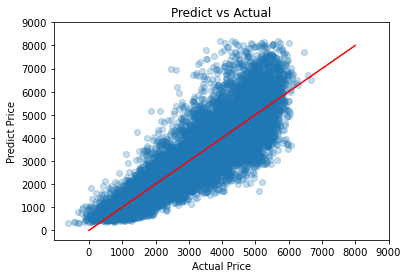

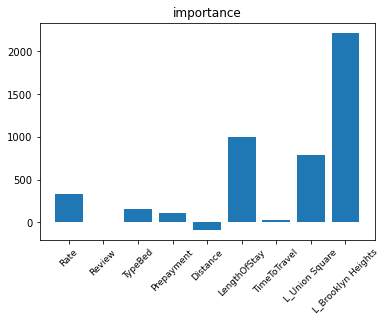

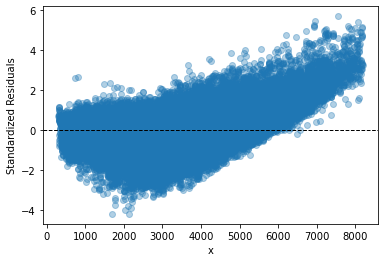

In [5]:
#LinearRegression



# Create model
from sklearn import linear_model
reg = linear_model.LinearRegression()
from matplotlib import pyplot

# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)



#Actual vs Predict
plt.title('Predict vs Actual')
plt.xlabel("Actual Price")
plt.ylabel("Predict Price")
X = np.linspace(0,8000,100)
Y = 1*X+0
plt.plot(X, Y, '-r')
plt.scatter(y_pred_test,y_test,alpha=0.25)
plt.xticks(np.arange(0,10000,step=1000))
plt.yticks(np.arange(0,10000,step=1000))
plt.show()




# get importance
plt.title('importance')
importance = reg.coef_
# summarize feature importance
pyplot.bar([x.columns[j] for j in range(len(importance))], importance)
pyplot.xticks(fontsize = 9,rotation=45)
pyplot.show()




#Residual plot
import statsmodels.api as sm

#add constant to predictor variables
x_r = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x_r).fit() 


#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal



plt.scatter(bookingHotels['Price'], standardized_residuals,alpha=0.35)
plt.xlabel('x')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

In the expensive prices, the model is wrong in the upward direction, the model thinks that the prices are more expensive than they really are, our hypothesis is that the price behavior does not increase regularly.
There is a certain stage where the price increases at a slower rate, so a linear model is not the best fit

In [6]:
#DecisionTreeRegressor

# Create model
from sklearn import tree
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
for i in range(1, 10):
    print("\n",i, ")")
    for j in range(1,10):
        print("\n",j, ")")
        
       #check criterions 
        reg = tree.DecisionTreeRegressor(criterion='mse', max_depth=i , min_samples_leaf=j, random_state=101)
        #reg = tree.DecisionTreeRegressor(criterion='friedman_mse', max_depth=i , min_samples_leaf=j, random_state=101)
        #reg = tree.DecisionTreeRegressor(criterion='mae', max_depth=i , min_samples_leaf=j, random_state=101)
        #reg = tree.DecisionTreeRegressor(criterion='poisson', max_depth=i , min_samples_leaf=j, random_state=101)

# Train the model
        
        reg.fit(x_train, y_train)
    
# Make predictions
        y_pred_test = reg.predict(x_test)
        y_pred_train = reg.predict(x_train)


#Calculate
        reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)



 1 )

 1 )
RMSE: 1156.637
MSE:  1337809.473
MAE:  908.076
R2_Test:   0.53
R2_Train:   0.529

 2 )
RMSE: 1156.637
MSE:  1337809.473
MAE:  908.076
R2_Test:   0.53
R2_Train:   0.529

 3 )
RMSE: 1156.637
MSE:  1337809.473
MAE:  908.076
R2_Test:   0.53
R2_Train:   0.529

 4 )
RMSE: 1156.637
MSE:  1337809.473
MAE:  908.076
R2_Test:   0.53
R2_Train:   0.529

 5 )
RMSE: 1156.637
MSE:  1337809.473
MAE:  908.076
R2_Test:   0.53
R2_Train:   0.529

 6 )
RMSE: 1156.637
MSE:  1337809.473
MAE:  908.076
R2_Test:   0.53
R2_Train:   0.529

 7 )
RMSE: 1156.637
MSE:  1337809.473
MAE:  908.076
R2_Test:   0.53
R2_Train:   0.529

 8 )
RMSE: 1156.637
MSE:  1337809.473
MAE:  908.076
R2_Test:   0.53
R2_Train:   0.529

 9 )
RMSE: 1156.637
MSE:  1337809.473
MAE:  908.076
R2_Test:   0.53
R2_Train:   0.529

 2 )

 1 )
RMSE: 961.232
MSE:  923967.708
MAE:  705.467
R2_Test:   0.675
R2_Train:   0.668

 2 )
RMSE: 961.232
MSE:  923967.708
MAE:  705.467
R2_Test:   0.675
R2_Train:   0.668

 3 )
RMSE: 961.232
MSE:  923967.

RMSE: 761.588
MSE:  580016.36
MAE:  545.079
R2_Test:   0.796
R2_Train:   0.806


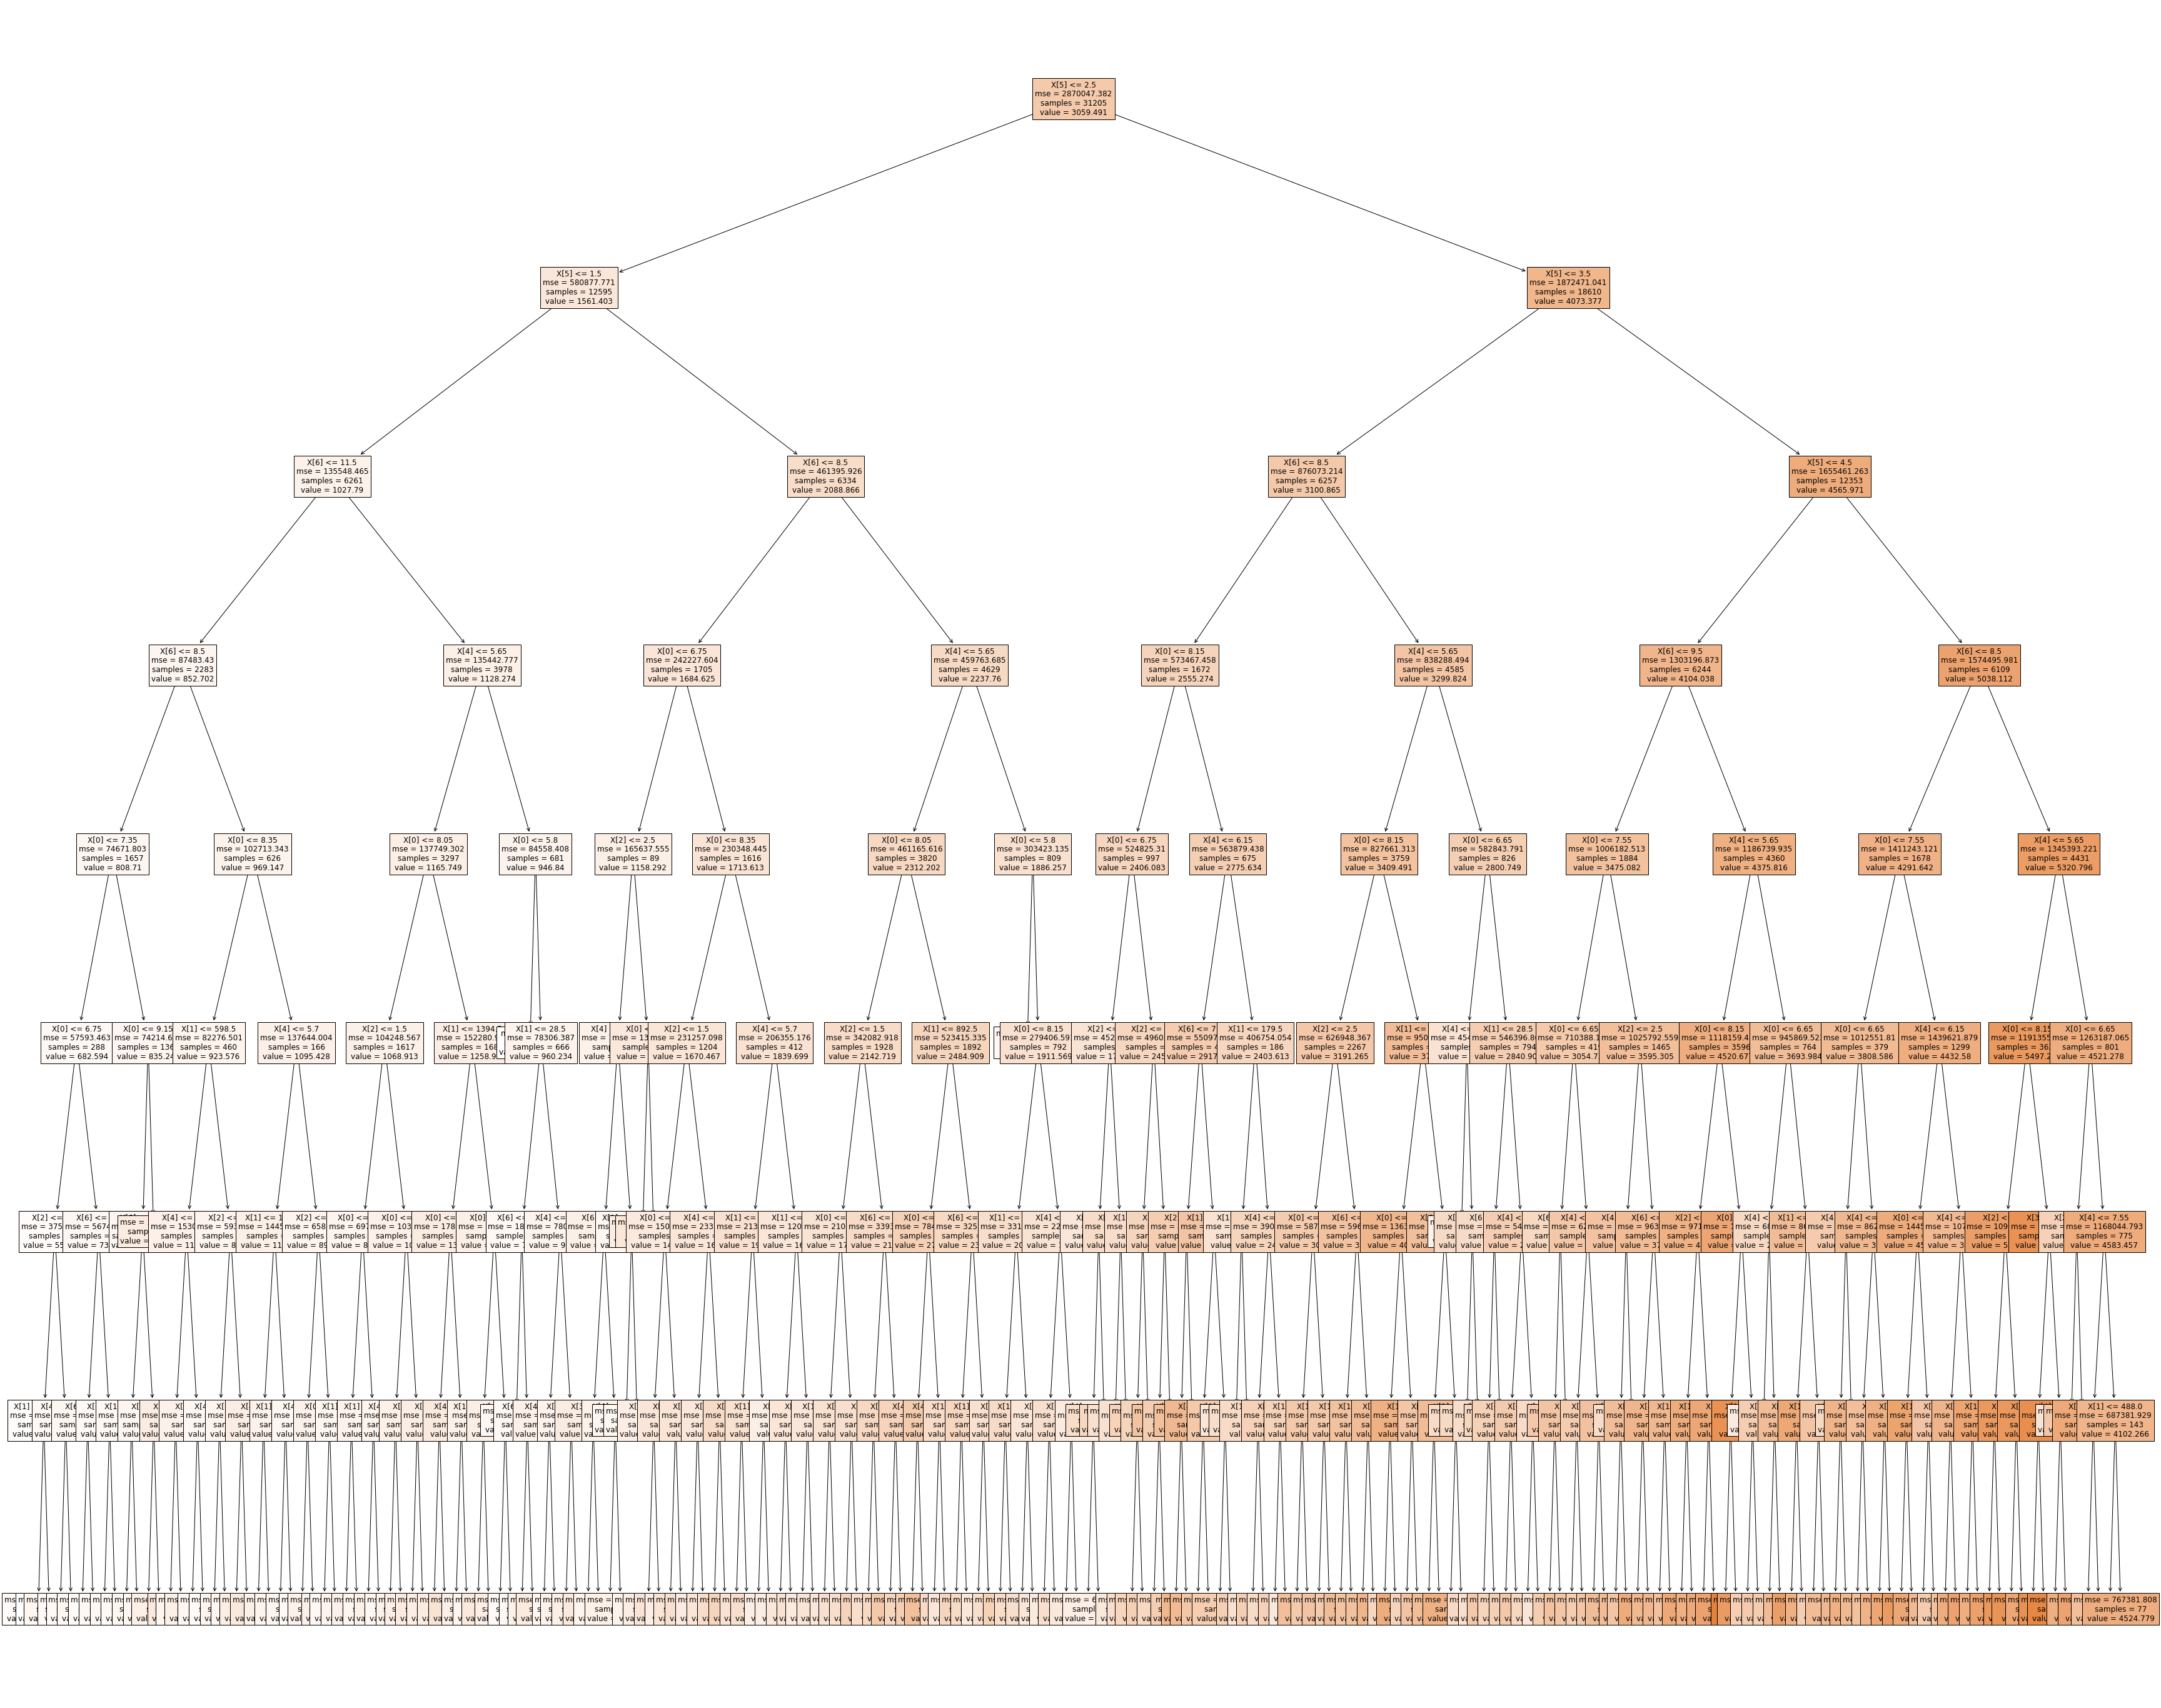

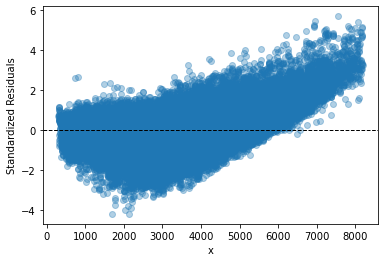

In [7]:
#DecisionTreeRegressor

# the best Tree regressor
 
reg = tree.DecisionTreeRegressor(criterion='mse', max_depth=8 , min_samples_leaf=9, random_state=101)

# Train the model
        
reg.fit(x_train, y_train)
    
# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)


#Visualisation
# Plot the decision tree
fig, ax = plt.subplots(figsize=(60, 50))
tree.plot_tree(reg, filled=True, fontsize=12, ax=ax)
plt.show()


#Residual plot
import statsmodels.api as sm

#add constant to predictor variables
x_r = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x_r).fit() 


#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal



plt.scatter(bookingHotels['Price'], standardized_residuals,alpha=0.35)
plt.xlabel('x')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()



In [4]:
#GaussianProcessRegressor

#Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
normalized = pd.DataFrame(scaled, columns = data.columns)
sampled = normalized.sample(frac=0.25)
x = sampled[['Rate','Review','TypeBed','Prepayment','Distance','LengthOfStay','TimeToTravel','L_Union Square','L_Brooklyn Heights']]
y = sampled['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)



# Create model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel , ExpSineSquared , RationalQuadratic, DotProduct
kernel = DotProduct() + WhiteKernel(noise_level=0.5)
reg = GaussianProcessRegressor(kernel=kernel)

# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)




RMSE: 0.104
MSE:  0.011
MAE:  0.076
R2_Test:   0.769
R2_Train:   0.764


In [5]:
#GaussianProcessRegressor


# Create model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel , ExpSineSquared , RationalQuadratic
kernel = 1.0 * ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1)) + WhiteKernel(
    1e-1)
reg = GaussianProcessRegressor(kernel=kernel)

# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)






RMSE: 0.098
MSE:  0.01
MAE:  0.071
R2_Test:   0.793
R2_Train:   0.789


In [6]:
#GaussianProcessRegressor



# Create model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
kernel = ConstantKernel(1.0) + ConstantKernel(1.0) * RBF(10)  + WhiteKernel(5)
reg = GaussianProcessRegressor(kernel=kernel)

# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)






RMSE: 0.095
MSE:  0.009
MAE:  0.068
R2_Test:   0.809
R2_Train:   0.817


RMSE: 711.271
MSE:  505906.026
MAE:  510.24
R2_Test:   0.822
R2_Train:   0.824


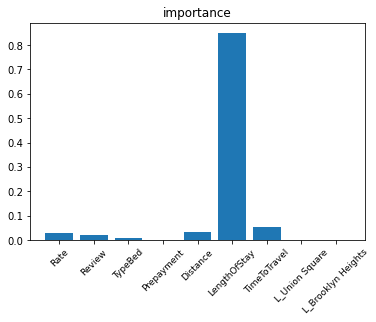

In [35]:
#Gradient Boosting Regression

#features + target

x = bookingHotels[['Rate','Review','TypeBed','Prepayment','Distance','LengthOfStay','TimeToTravel','L_Union Square','L_Brooklyn Heights']]
y = bookingHotels['Price']
data = bookingHotels[['Price','Rate','Review','TypeBed','Prepayment','Distance','LengthOfStay','TimeToTravel','L_Union Square','L_Brooklyn Heights']]

#test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)


# Create model
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=101)



# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)







# get importance
plt.title('importance')
importance = reg.feature_importances_
# summarize feature importance
pyplot.bar([x.columns[j] for j in range(len(importance))], importance)
pyplot.xticks(fontsize = 9,rotation=45)
pyplot.show()





#Residual plot
import statsmodels.api as sm

#add constant to predictor variables
x_r = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x_r).fit() 


#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal




In [36]:
#MLPRegressor

# Create model
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(random_state=101)

# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)





#Residual plot
import statsmodels.api as sm

#add constant to predictor variables
x_r = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x_r).fit() 


#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal



RMSE: 846.699
MSE:  716899.292
MAE:  635.537
R2_Test:   0.748
R2_Train:   0.744


RMSE: 877.639
MSE:  770250.008
MAE:  663.112
R2_Test:   0.729
R2_Train:   0.728


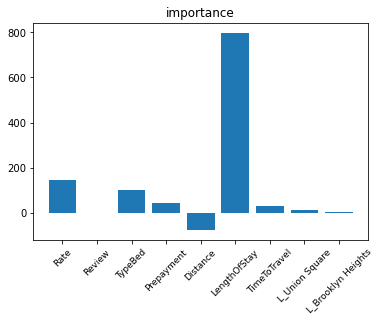

In [37]:
#Elastic Net Regression


#Create model
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
reg = ElasticNet(random_state=101)


# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)


# get importance
plt.title('importance')
importance = reg.coef_
# summarize feature importance
pyplot.bar([x.columns[j] for j in range(len(importance))], importance)
pyplot.xticks(fontsize = 9,rotation=45)
pyplot.show()




#Residual plot
import statsmodels.api as sm

#add constant to predictor variables
x_r = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x_r).fit() 


#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal





In [7]:
#More Features

#Day_of_week_snapshot

from datetime import date, datetime

Day_of_week_snapshot = []
for fulldate in bookingHotels["SnapShotDate"]:
	date_format = '%Y-%m-%d'
	date = datetime.strptime(fulldate, date_format)
	Day_of_week_snapshot.append(date.strftime('%w'))
bookingHotels["Day_of_week_snapshot"] = Day_of_week_snapshot
bookingHotels = bookingHotels.astype({"Day_of_week_snapshot":int})
bookingHotels["Day_of_week_snapshot"] += 1


#Number of weekend days
import datetime
from datetime import datetime , timedelta


def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

                
Number_of_weekend_days = []
for start,end in zip(bookingHotels.Start_Date,bookingHotels.End_Date):
    count=0
    date_format = '%Y-%m-%d'
    start = datetime.strptime(start, date_format)
    end = datetime.strptime(end, date_format)
    for single_date in daterange(start, end):
        day_of_week = int(single_date.strftime('%w'))+1
        if day_of_week in [5,6,7]:
            count=count+1        
    Number_of_weekend_days.append(count)
bookingHotels["Number_of_weekend_days"] = Number_of_weekend_days
bookingHotels = bookingHotels.astype({"Number_of_weekend_days":"int"})


#price for night

bookingHotels['Price_per_night'] = bookingHotels['Price']/ bookingHotels['LengthOfStay']

#Day of month check in

Day_of_month_check_in = []
for date in bookingHotels["Start_Date"]:
	date_format = '%Y-%m-%d'
	date = datetime.strptime(date, date_format)
	Day_of_month_check_in.append(date.strftime('%d'))
bookingHotels["Day_of_month_check_in"] = Day_of_month_check_in
bookingHotels = bookingHotels.astype({"Day_of_month_check_in":int})


#Day of month check out

Day_of_month_check_out = []
for date in bookingHotels["End_Date"]:
	date_format = '%Y-%m-%d'
	date = datetime.strptime(date, date_format)
	Day_of_month_check_out.append(date.strftime('%d'))
bookingHotels["Day_of_month_check_out"] = Day_of_month_check_out
bookingHotels = bookingHotels.astype({"Day_of_month_check_out":int})

RMSE: 785.625
MSE:  617207.314
MAE:  576.844
R2_Test:   0.783
R2_Train:   0.784


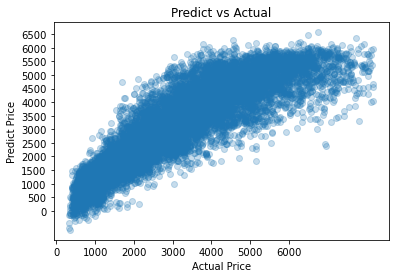

In [45]:
#Prediction with new features

#features + target

x = bookingHotels[['Day_of_week_snapshot','Number_of_weekend_days','Day_of_month_check_in','Day_of_month_check_out','Rate','Review','TypeBed','Prepayment','Distance','LengthOfStay','TimeToTravel','L_Union Square','L_Brooklyn Heights']]
y = bookingHotels['Price']
data = bookingHotels[['Rate','Review','LengthOfStay','Price','Day_of_week_snapshot','Number_of_weekend_days','Day_of_month_check_in','Day_of_month_check_out']]


#test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)



#LinearRegression



# Create model
from sklearn import linear_model
reg = linear_model.LinearRegression()

# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)


#visualisation
plt.title('Predict vs Actual')
plt.xlabel("Actual Price")
plt.ylabel("Predict Price")
plt.scatter(y_test, y_pred_test,alpha=0.25)
plt.xticks(np.arange(0,7000,step=1000))
plt.yticks(np.arange(0,7000,step=500))
plt.show()

RMSE: 681.141
MSE:  463953.588
MAE:  481.667
R2_Test:   0.837
R2_Train:   0.84


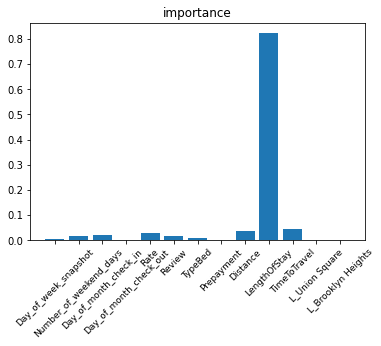

In [46]:
#Gradient Boosting Regression


# Create model
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=101)



# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)







# get importance
plt.title('importance')
importance = reg.feature_importances_
# summarize feature importance
pyplot.bar([x.columns[j] for j in range(len(importance))], importance)
pyplot.xticks(fontsize = 9,rotation=45)
pyplot.show()





#Residual plot
import statsmodels.api as sm

#add constant to predictor variables
x_r = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x_r).fit() 


#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal





In [8]:
#newsplit


#Gradient Boosting Regression


train = bookingHotels[bookingHotels.TimeToTravel < 25]
test = bookingHotels[bookingHotels.TimeToTravel > 25]
x_train = train[['Rate','Review','TypeBed','Prepayment','Distance','LengthOfStay','TimeToTravel','L_Union Square','L_Brooklyn Heights']]
x_test =  test[['Rate','Review','TypeBed','Prepayment','Distance','LengthOfStay','TimeToTravel','L_Union Square','L_Brooklyn Heights']]
y_train = train['Price']
y_test =  test['Price']



# Create model
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=101)



# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


#Calculate
reg_metrics(y_test, y_pred_test, x_train,y_pred_train,y_train)



#Residual plot
import statsmodels.api as sm

#add constant to predictor variables
x_r = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x_r).fit() 


#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal


RMSE: 766.962
MSE:  588230.482
MAE:  552.925
R2_Test:   0.812
R2_Train:   0.825


In [52]:
#create the csv file
bookingHotels.to_csv('bookingHotelsClean2.csv', index=False)

conclusions:

1. The gradient boost gave the best results.<br />
2. After we added the features our models gave better result.<br />
3. After a different distribution of the train and the test, you can see that the models still give good results.